# Proyecto 2

### En la primera parte, vamos a exportar la paquetería que se necesitá para la resolución del problema, para esto, primero se va a revisar que los datos en el archivo estén todos correctos. Vamos a leerlos y, posteriormente, vamos a identificar posibles problemas en estos

In [64]:
# Used to read the data file
import pandas as pd

# Used in the definition of the model and its initial condition
import numpy as np

# Used for plots other than those generated by the parameter estimation module
import matplotlib.pyplot as plt
%matplotlib inline
import PDEparams as pde

In [65]:
df = pd.read_csv('CoV2019.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
Date of report    41 non-null object
Days              41 non-null int64
Total             41 non-null int64
China             41 non-null int64
Death China       41 non-null int64
Other             41 non-null int64
Death Outside     41 non-null int64
Death Globally    41 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.7+ KB


In [67]:
df.head()

,Date of report,Days,Total,China,Death China,Other,Death Outside,Death Globally
0,01/20/20,21,282,278,6,4,0,6
1,01/21/20,22,346,341,6,4,0,6
2,01/23/20,24,581,571,17,7,0,17
3,01/24/20,25,846,830,25,11,0,25
4,01/25/20,26,1320,1297,41,23,0,41


Los archivos en primera instancia se ven bastante bien, por lo cual, ahora se va a utilizar el módelo ISR para este sistema, el cual viene dada por:

$$\begin{align}
\frac{\mathrm{d} S}{\mathrm{d} t} &= -\beta\, S\, I\,\\
\frac{\mathrm{d} I}{\mathrm{d} t} &= +\beta\,S\,I-\gamma\,I\\
\frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I
\end{align}$$

donde <span style="color:red">$S$</span> es la población susceptible, <span style="color:red">$I$</span> es la población infectada y <span style="color:red">$R$</span> es la población inmune o fallecida.

En este caso, dado que solo conocemos la población fallecida y no inmune, entonces, solo se cuentan con los datos de la población infectada por día, la cual, viene dada por el feature de "China" en nuestros datos, es decir, "China" corresponde a <span style="color:red">$I$</span> en nuestro modelo.

In [116]:
df['I']=''
df['I'].iloc[0]=df['China'].iloc[0]
for i in range(1,41):
    df['I'].iloc[i]=df['China'].iloc[i]-df['China'].iloc[i-1]
df['I']=df['I']/df['I'].max()
df['Death China']=df['Death China']/df['Death China'].max()
df

,Date of report,Days,Total,China,Death China,Other,Death Outside,Death Globally,I
0,01/20/20,21,282,278,0.002088,4,0,6,0.014285
1,01/21/20,22,346,341,0.002088,4,0,6,0.003237
2,01/23/20,24,581,571,0.005917,7,0,17,0.011819
3,01/24/20,25,846,830,0.008702,11,0,25,0.013309
4,01/25/20,26,1320,1297,0.014271,23,0,41,0.023997
5,01/26/20,27,2014,1985,0.019492,29,0,56,0.035353
6,01/27/20,28,2798,2761,0.027845,37,0,80,0.039875
7,01/28/20,29,4593,4537,0.036895,56,0,106,0.091259
8,01/29/20,30,6065,5997,0.045945,68,0,132,0.075022
9,01/30/20,31,7818,7736,0.059172,82,0,170,0.089358


Ahora, se va a definir la función del modelo ISR y las condiciones iniciales para $I$, $S$ y $R$.

In [117]:
def ISR(z,t,b,g):
    S , I , R = z
    return [-b*S*I, (b*S*I)-g*I, g*I]

In [119]:
def S_initial():
    return 1
def R_initial():
    return 0
def I_initial():
    return 0.014285

In [120]:
df1=pd.DataFrame(data={'0': df['Days'],'2':df['I']})
df1

,0,2
0,21,0.014285
1,22,0.003237
2,24,0.011819
3,25,0.013309
4,26,0.023997
5,27,0.035353
6,28,0.039875
7,29,0.091259
8,30,0.075022
9,31,0.089358


Ahora, se va a ajustar el sistema de ecuaciones diferenciales a los datos

In [196]:
my_model = pde.PDEmodel(df1, ISR, [S_initial,I_initial,R_initial], bounds=[(0.01,6),(0.01,6)], 
                        param_names=[r'$b$', r'$g$'], nvars=3, ndims=0, nreplicates=1, obsidx=1, outfunc=None)

In [197]:
my_model.initial_condition

array([1.      , 0.014285, 0.      ])

Ahora, obtenemos $\beta$ y $\gamma$.

In [198]:
my_model.fit()

       $b$       $g$
0  0.20106  0.112026


In [199]:
my_model.best_params

,$b$,$g$
0,0.20106,0.112026


In [200]:
my_model.best_error

0.021684218701557005

Veamos ahora la identificabilidad de los parametros, para esto, calculamos el likelihood de los parámetros

In [201]:
my_model.likelihood_profiles()

In [202]:
my_model.result_profiles

,parameter,value,error
0,$b$,0.010000,0.030778
1,$b$,0.070505,0.025187
2,$b$,0.131010,0.023633
3,$b$,0.191515,0.021740
4,$b$,0.252020,0.023090
...,...,...,...
195,$g$,5.757980,0.033420
196,$g$,5.818485,0.033420
197,$g$,5.878990,0.033420
198,$g$,5.939495,0.033420


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


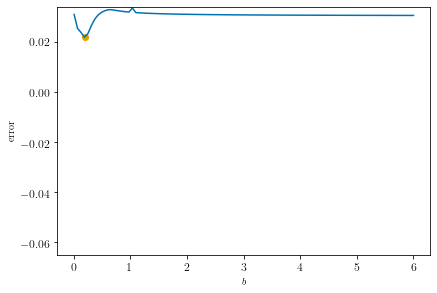

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


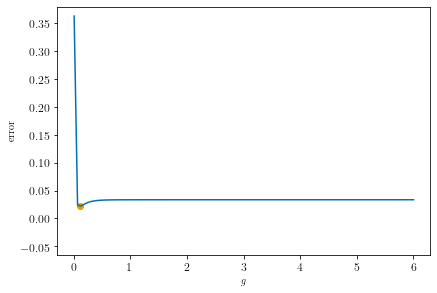

In [203]:
my_model.plot_profiles()

Como observamos, hay identificabilidad de los parámetros, ya que, existe un mínimo para $\beta$ y $\gamma$.